In [1]:
import numpy as np
from numpy.random import seed
seed(1)
#import tensorflow-gpu
import tensorflow as tf
tf.random.set_seed(2) 
import os
import seaborn as sn
from tensorflow import keras

In [2]:
from tensorflow.keras.preprocessing import sequence

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Lambda
from tensorflow.keras.layers import Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import Normalizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical


import numpy as np
import h5py
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from imblearn.over_sampling import SMOTE
import matplotlib as mpl
import matplotlib.pylab as plt
import pandas as pd
plt.ion()
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from scipy import interp 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from tensorflow.keras.utils import plot_model

import time
# number of wine classes
#classifications = 3
#epochs=50
#dimension=3


In [14]:
classifications = 10
epochs=50
dimension=10
########### load dataset################

In [22]:
#dataset1 = np.loadtxt('D:\PycharmProjects\pythonProject\dataset.csv', delimiter=",")
#dataset1 = np.loadtxt('D:\Dr.Rashid\FINAL WITH API\Results\APILSA_svd_u2.csv', delimiter=",")
#dataset1 = np.loadtxt('D:\Dr.Rashid\FINAL WITH API\Results\LSA\SVD10_RGDD.csv', delimiter=",")
#dataset1 = np.loadtxt('D:\Dr.Rashid\FINAL WITH API\Results\TFIDF\TFIDF12_RGDp.csv', delimiter=",")
#dataset1 = np.loadtxt('D:\Dr.Rashid\FINAL WITH API\code\Dataset\weka\mawlarePermission_V_SMOTE1_Deep.csv', delimiter=",")
#dataset1 = np.loadtxt('D:\Dr.Rashid\FINAL WITH API\code\Dataset\weka\mawlarePermission_V1.csv', delimiter=",")
#dataset1 = np.loadtxt('E:/DeepLearningModel -Medical Dataset/data/SARS-COV-2 Ct-Scan Dataset-PCA.csv', delimiter="," )
#dataset1 = np.loadtxt('D:/2018_2019/NPU_2020/Research_2021/Malware/Datasets/8_ Android_Malware/Android Adware/Datasets/HTTP/refine/Classification/classification/HTTP_Classification_V1.2.csv', delimiter=",")
#dataset1 = np.loadtxt('D:/2018_2019/NPU_2020/Research_2021/Malware/Datasets/8_ Android_Malware/Android Adware/Datasets/HTTP/refine/deep learning/Detection/HTTP_Detection_V.csv', delimiter=",")
#dataset1 = np.loadtxt('D:/2018_2019/NPU_2020/Research_2021/Malware/Datasets/8_ Android_Malware/Android Adware/Datasets/HTTP/refine/deep learning/Detection/HTTP_Detection_V.csv', delimiter=",")
#dataset1 = np.loadtxt('D:/Research_2022/New datasets/datasets/Android Adware/1.Descriptors/Datasets/AndroidAdware_229/Refine/AndroidAdware_229Epoch.csv', delimiter=",")
#dataset1 = np.loadtxt('D:/Research_2022/New_datasets/IDS_paper_4/datasets/1. UNSW-NB15/a part of training and testing set/refine/refine3_D/UNSW_NB15_testing-set.csv', delimiter=",")
#dataset1 = np.loadtxt('D:/Research_2022/New_datasets/IDS_paper_4/datasets/2. CIC-IDS2017/refine1/refine2/refine3/Friday_DDos.csv', delimiter=",")
#dataset1 = np.loadtxt('D:/Research_2022/New_datasets/IDS_paper_4\datasets/3. NSL_KDD/more/more1/refine2/refine3/refine4/1. KDDTrain+.csv', delimiter=",")
#dataset1 = np.loadtxt('D:/Research_2022/New_datasets/IDS_paper_4/datasets/1. UNSW-NB15/a part of training and testing set/refine/refine3_subs/testing/deep/basic2.csv', delimiter=",")
#dataset1 = np.loadtxt('D:/Research_2022/New_datasets/IDS_paper_4/datasets/2. CIC-IDS2017/refine1/refine2/refine3/Thursday_WebAttacks.csv', delimiter=",")
#dataset1 = np.loadtxt('D:/Research_2022/New_datasets/IDS_paper_4/datasets/3. NSL_KDD/more/more1/refine2/refine3/refine4/4. KDDTrain+_20Percent.csv', delimiter=",")
#dataset1 = np.loadtxt('D:/Research_2022/New_datasets/IDS_paper_4/datasets/1. UNSW-NB15/a part of training and testing set/refine/refine3_subs/testing/deep/basic1.csv', delimiter=",")
dataset1 = np.loadtxt('/Users/idris/Documents/Data Visualization/basic1.1.csv', delimiter=",")

In [23]:
ticklabels =['0','1', '2', '3', '4', '5', '6', '7', '8', '9']

In [24]:
#X = dataset1[:,0:1023]
#Y = dataset1[:,1024]
X = dataset1[:,0:10]
Y = dataset1[:,10]

In [27]:
#sm = SMOTE(random_state=42)
#X, Y = sm.fit_resample(X, Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

#sm = SMOTE(random_state=42)
#x_train, y_train = sm.fit_resample(x_train, y_train)
#x_test, y_test = sm.fit_resample(x_test, y_test)

#sm = SMOTE(random_state=42)
#X, Y = sm.fit_resample(X, Y)

#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.22, random_state=0)

#sm = SMOTE  (random_state=42)
#x_train, y_train = sm.fit_resample(x_train, y_train)
#x_test, y_test = sm.fit_resample(x_test, y_test)

Y_train = to_categorical(y_train - 1, classifications)
Y_test = to_categorical(y_test-1, classifications)

X_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
X_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [30]:
################# Model ####################
model = Sequential()
model.add(Convolution1D(32, 4, padding="same",activation="relu",input_shape=(dimension, 1)))
model.add(MaxPooling1D(pool_size=2,padding='same'))
model.add(Dropout(0.4))
model.add(Convolution1D(64, 4, padding="same", activation="relu"))
model.add(MaxPooling1D(pool_size=2,padding='same'))
model.add(Dropout(0.4))
#model.add(Convolution1D(256, 4, padding="same", activation="relu"))
#model.add(MaxPooling1D(pool_size=2,padding='same'))
#model.add(Dropout(0.2))
#model.add(Convolution1D(512, 3, padding="same", activation="relu"))
#model.add(MaxPooling1D(pool_size=2,padding='same'))
#model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(classifications, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])
model.summary()
checkpointer = callbacks.ModelCheckpoint(filepath="C:/Users/idris/Documents/Data Visualization/Homework 5/images/checkpoint-{epoch:02d}.keras", save_best_only=True, monitor='val_accuracy')
csv_logger = CSVLogger('C:/Users/idris/Documents/Data Visualization/Homework 5/images/cnn.csv',separator=',', append=False)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 10, 32)              │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 5, 64)               │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,594 (92.16 KB)

 Trainable params: 23,594 (92.16 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

time_callback = TimeHistory()

In [32]:
history=model.fit(X_train, Y_train, epochs=epochs,verbose=1,batch_size=32,validation_data=(X_test, Y_test),callbacks=[checkpointer,csv_logger,time_callback])
print(time_callback.times)
total=sum(time_callback.times) 
print("Total Time of Training=")
print("%.3f" %total)
model.save("C:/Users/idris/Documents/Data Visualization/Homework 5/images/cnn.hdf5")
model.summary()

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.3792 - loss: 1.9193 - val_accuracy: 0.4725 - val_loss: 1.5637
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.4620 - loss: 1.5474 - val_accuracy: 0.6350 - val_loss: 1.2270
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5843 - loss: 1.3138 - val_accuracy: 0.7010 - val_loss: 1.0245
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6414 - loss: 1.1550 - val_accuracy: 0.7230 - val_loss: 0.9256
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6637 - loss: 1.0910 - val_accuracy: 0.7395 - val_loss: 0.8480
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6869 - loss: 1.0061 - val_accuracy: 0.7750 - val_loss: 0.7577
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7265 - loss: 0.8958 - val_accuracy: 0.8180 - val_loss: 0.6835
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7407 - loss: 0.8797 - val_acc

[12.1373929977417, 8.297410726547241, 6.037722110748291, 4.140159845352173, 4.596021890640259, 3.58795166015625, 3.499359607696533, 6.148362159729004, 4.001485824584961, 6.090189695358276, 5.279849052429199, 4.803955078125, 5.3620758056640625, 4.206370830535889, 4.433955907821655, 4.541781902313232, 5.7903218269348145, 5.404505729675293, 4.451996564865112, 5.485904216766357, 5.288042783737183, 3.548670530319214, 6.368226766586304, 4.9332756996154785, 4.239917755126953, 5.120884418487549, 5.221794366836548, 4.709776163101196, 4.409030199050903, 4.930991172790527, 4.432758331298828, 4.054269075393677, 6.230374574661255, 4.009785175323486, 4.542805910110474, 5.797581911087036, 4.303431749343872, 3.8246898651123047, 5.70515251159668, 5.383055210113525, 5.079955101013184, 4.971379995346069, 4.575379133224487, 4.8598387241363525, 4.711339712142944, 5.304027557373047, 3.960064172744751, 3.8784890174865723, 3.203263759613037, 3.753553628921509]
Total Time of Training=
249.649


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 10, 32)              │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 5, 64)               │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,784 (276.50 KB)

 Trainable params: 23,594 (92.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,190 (184.34 KB)

In [33]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


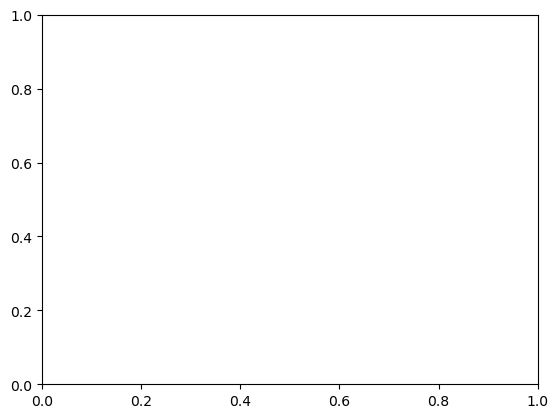

In [34]:
###############  Plot History ##################
fig, ax=plt.subplots()

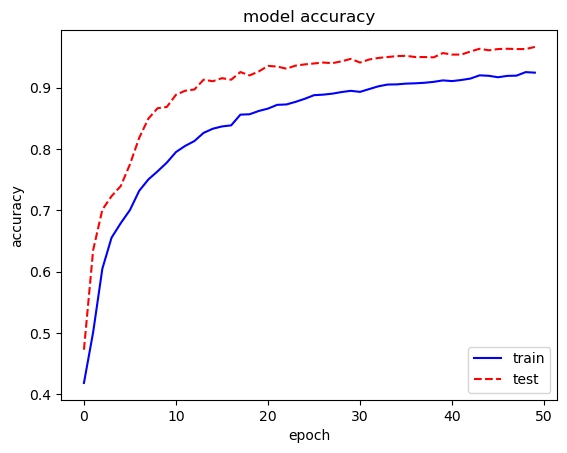

In [35]:
plt.plot(history.history['accuracy'],'b-')
plt.plot(history.history['val_accuracy'],'r--')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
ax.set_xticks(range(0, epochs+4, 50))
ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=8)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.legend(['train', 'test'], loc='lower right')
plt.savefig('C:/Users/idris/Documents/Data Visualization/Homework 5/images/model_accuracy.png')

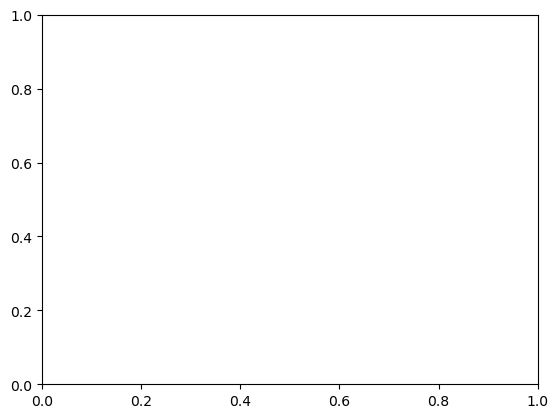

In [36]:
fig, ax=plt.subplots()

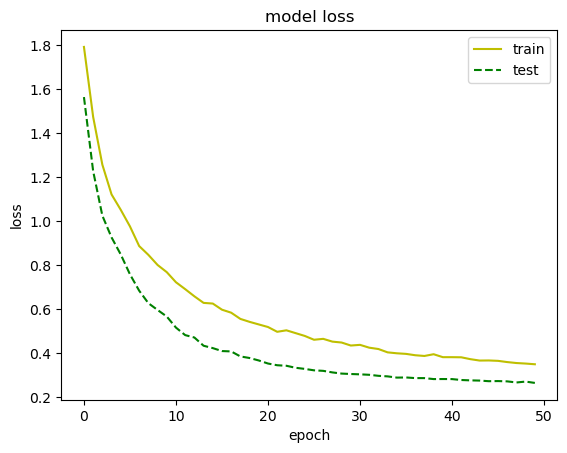

In [37]:
plt.plot(history.history['loss'],'y-')
plt.plot(history.history['val_loss'],'g--')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax.set_xticks(range(0, epochs+4, 50))
ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=8)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('C:/Users/idris/Documents/Data Visualization/Homework 5/images/model_loss.png')

In [38]:
############## Classification Report ########################
loss, accuracy = model.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
predi = model.predict(X_test)
pred = np.argmax(predi, axis=1)
y_test2 = np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test2, pred)
np.set_printoptions(precision = 2)
cm_normalized = np.around(cm.astype('float') / cm.sum(axis=1) [:, np.newaxis], decimals=2)
print('Report :')
print(classification_report(y_test2, pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9696 - loss: 0.2363

Loss: 0.26, Accuracy: 96.65%
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Report :
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        79
           1       0.98      0.91      0.94        90
           2       0.95      0.90      0.92        88
           3       0.97      1.00      0.98       818
           4       0.96      0.82      0.89        33
           5       1.00      0.88      0.93        48
           6       0.97      0.97      0.97       300
           7       0.97      0.98      0.97       205
           8       0.96      0.88      0.91        49
           9       0.96      0.98      0.97       290

    accuracy                           0.97      2000
   macro avg       0.97      0.92      0.94      2000
weighted avg       0.97      0.97      0.97      2000



confusion matrix with normalization
[[0.89 0.   0.01 0.06 0.   0.   0.01 0.   0.   0.03]
 [0.   0.91 0.   0.07 0.   0.   0.   0.01 0.   0.01]
 [0.   0.   0.9  0.06 0.   0.   0.   0.01 0.   0.03]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.03 0.82 0.   0.09 0.   0.03 0.03]
 [0.   0.02 0.   0.02 0.   0.88 0.02 0.04 0.   0.02]
 [0.01 0.   0.   0.01 0.   0.   0.97 0.   0.   0.  ]
 [0.   0.   0.   0.02 0.   0.   0.   0.98 0.   0.  ]
 [0.   0.   0.   0.04 0.   0.   0.02 0.02 0.88 0.04]
 [0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.98]]


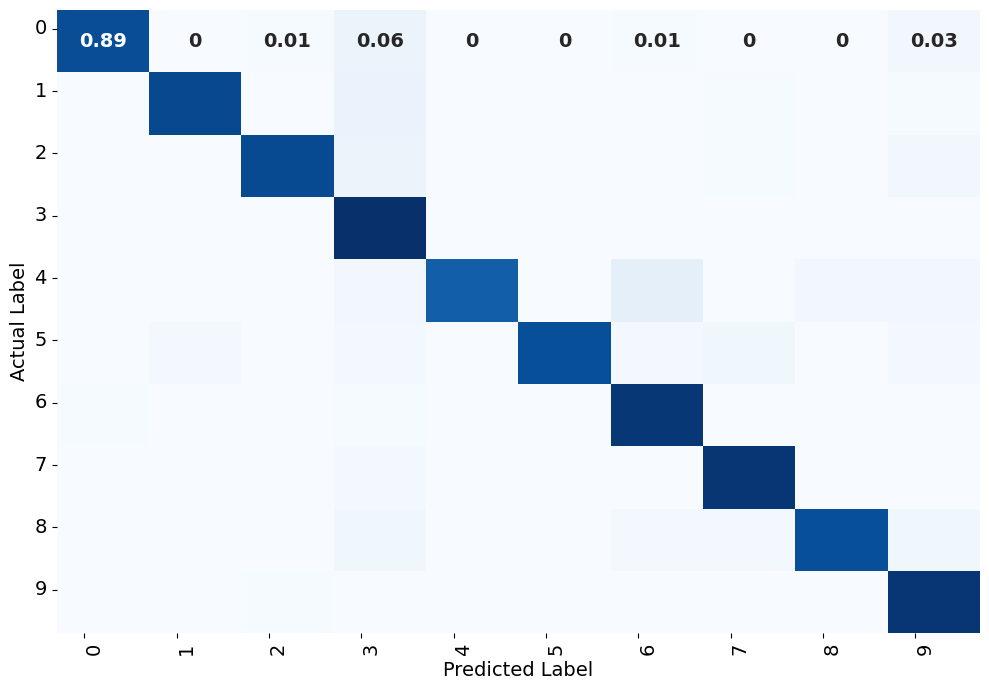

In [39]:
############ Confusion Matrix ###############################
print('confusion matrix with normalization')
print(cm_normalized)
fig, ax = plt.subplots(figsize = (10,7))
sn.heatmap(cm_normalized, annot=True,annot_kws={"size": 14,"fontweight": 'bold'},cmap='Blues',cbar=False) # font size
plt.ylabel('Actual Label', fontsize = 14)
plt.xlabel('Predicted Label', fontsize = 14)
ax.set_xticks(np.arange(len(ticklabels))+ 0.3)
ax.set_yticks(np.arange(len(ticklabels))+ 0.3)
ax.set_xticklabels(ticklabels)
ax.set_yticklabels(ticklabels)
plt.setp(ax.get_xticklabels(), rotation=90,rotation_mode="anchor",ha="right",fontsize=14)
plt.setp(ax.get_yticklabels(), rotation=360, ha="right",rotation_mode="anchor",fontsize=14)
fig.tight_layout()
plt.savefig('C:/Users/idris/Documents/Data Visualization/Homework 5/images/confusion_matrix.png')

In [40]:
########### ROC AUC CURVE ####################

fpr = dict()  
tpr = dict()  
roc_auc = dict()  
for i in range(classifications):  
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], predi[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [41]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), predi.ravel())  
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

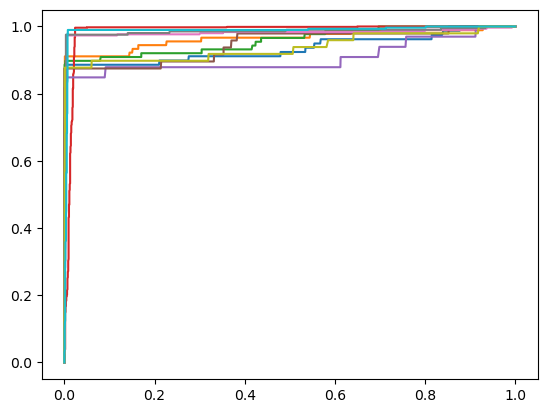

In [42]:
# Plot all ROC curves
plt.figure()  
#plt.plot(fpr["micro"], tpr["micro"],
#         label='micro-average ROC curve (area = {0:0.2f})'
#               ''.format(roc_auc["micro"]),
#         linewidth=2)
for i in range(classifications):
    plt.plot(fpr[i], tpr[i], 
             label='ROC curve of class {0} (area = {1:0.2f})'  ''.format(i, roc_auc[i]))

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve Analysis')
plt.legend(loc="lower right")
plt.savefig('D:\\PycharmProjects\\pythonProject\\cnnlstm\\ruc_auc.png')
